In [67]:
from Bio import pairwise2
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna
from Bio.pairwise2 import format_alignment
from IPython.display import Image
import math
import numpy as np
import random
from random import choice
import itertools

# 1) Construct a multiple sequence alignment of the following four sequences. Report the final alignment and show your work. Steps in progressive multiple sequence alignment:

1) Perform all pairwise alignments using dynamic programming


2) Select the best pairwise alignment to initiate the multi-seq alignment


3) Recursively add additional sequences to the current alignment by calculating the best addition using sum of pairs scoring. Use the pairwise alignment you made in step 1 to decide how to add the new sequence to the multi-seq alignment. (In this algorithm, a gap opened will stay opened until the end, hence greedy approach)

#### Unfortunately, due to the fact that I did not have a traceback algorithm working, I was not able to complete this problem as asked. However, Donghun said if I could complete the problem and show how I did it, I could get points for this one and some for problem 2. I used Geneious software that can perform multiple sequence alignment using Needleman-Wunsch algorithm. It should be noted that the only part that I needed to use Geneious for was the alignment. 

In [4]:
#Perform all pairwise alignments using dynamic programming
x1 = 'GCTGATATAGCT'
x2 = 'GGGTGATTAGCT'
x3 = 'GCTATCGC'
x4 = 'AGCGGAACACCT'
sequences = ('GCTGATATAGCT','GGGTGATTAGCT','GCTATCGC','AGCGGAACACCT')
#pairwise2.align.globalxx(seq1, seq2, match, mismatch, open gap, extend gap)
x1x2 = pairwise2.align.globalms(x1,x2, 1, -1, -1, -.1)
x1x3 = pairwise2.align.globalms(x1,x3, 1, -1, -1, -.1)
x1x4 = pairwise2.align.globalms(x1,x4, 1, -1, -1, -.1)
x2x3 = pairwise2.align.globalms(x2,x3, 1, -1, -1, -.1)
x2x4 = pairwise2.align.globalms(x2,x4, 1, -1, -1, -.1)
x3x4 = pairwise2.align.globalms(x3,x4, 1, -1, -1, -.1) 
all_alignments = (x1x2[0], x1x3[0], x1x4[0], x2x3[0], x2x4[0], x3x4[0])
# print(all_alignments)

best_alignment_score = 0
best_alignment = []
for i in range(len(all_alignments)):
    if all_alignments[i][2] > best_alignment_score:
        best_alignment_score = all_alignments[i][2]
        best_alignment = all_alignments[i]
        best_index = i
    else:
        pass
print(best_index)
print(best_alignment)


0
('GC-TGATATAGCT', 'GGGTGAT-TAGCT', 7.0, 0, 13)


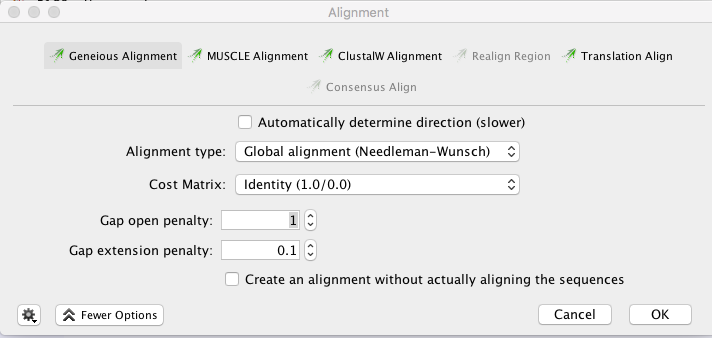

In [5]:
Image('geneious.png')

#### 1. First, I aligned all sequences. (code above) 
#### 2. Second, I found the sequence alignment with the best alignment score. (code above)
#### 3. The best sequence alignment was between X1 and X2, (image below)

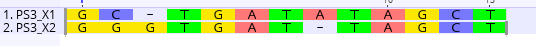

In [6]:
Image('X1X2.png')

#### 4. Next, I performed alignments of the remaining sequences (X3 and X4) to the X1X2 alignment. (It should be noted that here I would be using the mult_global_alignment code that is below.) Instead of comparing 2 sequences, this algorithm compares a sequence to an alignment. 

In [7]:
# def mult_global_alignment(ref_seq1, ref_seq2, search_seq):
#     #Make a matrix full of zeros that is the len(ref_seq)+1 and len(search_seq+1)
#     global_graph = np.zeros((len(search_seq)+2, len(ref_seq1)))
#     #This graph will tell where the score came from.
#     position_graph = np.zeros((len(search_seq)+2, len(ref_seq1)), dtype= object)
    
#     #Initialize graph
#     icount = 0
#     for i in range(0, len(search_seq)+2):
#         global_graph[i,0]= icount
#         icount -= 1
        
#     jcount = 0
#     for j in range(0,len(ref_seq1)):
#         global_graph[0,j] = jcount
#         jcount -= 1
 
#     #Fill in the graph according to rules. At each position, calc score for match/mismatch or indel. Take greatest. 
#     for i in range(1, len(search_seq)+2):
#         for j in range(1, len(ref_seq1)):
#             d = global_graph[i-1,j-1]
#             a = global_graph[i-1, j]-1
#             l = global_graph[i,j-1]-1
            
#             #First, determine if you have a match or mismatch and calc. diagonal from that
#             if ref_seq1[i-1] == search_seq[j-1] and ref_seq2[i-1] == search_seq[j-1] :
#                 d += 1
#             if ref_seq1[i-1] != search_seq[j-1] and ref_seq2[i-1] == search_seq[j-1]:
#                 d += 1
#                 d -= 1
#             if ref_seq1[i-1] == search_seq[j-1] and ref_seq2[i-1] != search_seq[j-1]:
#                 d += 1
#                 d -= 1
#             if ref_seq1[i-1] != search_seq[j-1] and ref_seq2[i-1] != search_seq[j-1]:
#                 d -= 1
#                 d -= 1
                   
                
#             #1st scenario: diagonal is greater than above and left     
#             if d > a and d > l:
#                 global_graph[i,j]= d
#                 #Position graph (diagonal, left, above)
#                 position_graph[i,j] = (1,0,0)
#             #2nd scenario: left is greater than diagonal and above
#             if l > d and l > a:
#                 global_graph[i,j] = l
#                 position_graph[i,j] = (0,1,0)
#             #3rd scenario: above is greater than diagonal and left
#             if a > d and a > l:
#                 global_graph[i,j] = l
#                 position_graph[i,j]= (0,0,1)
#             #4th scenario: 
#             if d == a and d > l:
#                 global_graph[i,j] = d
#                 position_graph[i,j] = (1,0,1)
#             #5th scenario
#             if d == l and d > a:
#                 global_graph[i,j] = d
#                 position_graph[i,j] = (1,1,0)
#             #6th scenario
#             if a == l and a > d:
#                 global_graph[i,j]= a
#                 position_graph[i,j] = (0,1,1)
#             #7th scenario
#             if a == l == d:
#                 global_graph[i,j] = a
#                 position_graph[i,j] = (1,1,1)
#     return global_graph, position_graph


Because the above code could not be used, I took advantage of the geneious alignment software again. Below are the two alignments between X1X2-X3 and X1X2-X4

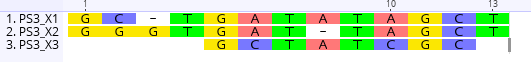

In [8]:
Image('X1X2-X3.png')

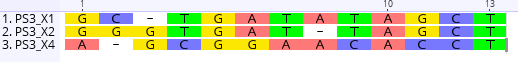

In [9]:
Image('X1X2-X4.png')

#### 5. From these 2 alignments, it was necessary to compute the sum of pairs score to determine which alignment to keep. 

In [117]:
X1X2_X3= [['GC-TGATATAGCT'], 
          ['GGGTGAT-TAGCT'], 
          ['----GCTATCGC-']]

X1X2_X4= [['GC-TGATATAGCT'],
          ['GGGTGAT-TAGCT'], 
          ['A-GCGGAACACCT']]

def sum_pairs_score(alignment):
    '''
    This 
    '''
    seqs = len(alignment)
    
    #Create list of all comparisons of sequences
    comparisons = []
    for comb in itertools.combinations(list(range(seqs)), 2):
        comparisons.append(comb)
        
    #Run through each combination of comparisons
    score = 0
    for comp in comparisons:
        i, j = comp
        seq1 = alignment[i]
        seq2 = alignment[j]
#         print(seq1, seq2)
        seq_zip = zip(seq1, seq2)
    
        for l,m in seq_zip:
            if l == m: 
                if l == '-' and m == '-' :
                    score += 0
                else:
                    score += 1
            if l != m:
                score -= 1
        
    return score


X1X2_X3_score = sum_pairs_score(X1X2_X3)
X1X2_X4_score = sum_pairs_score(X1X2_X4)

if X1X2_X3_score > X1X2_X4_score:
    print('Keep X1X2_X3 alignment')
else: 
    print('Keep X1X2_X4 alignment')

Keep X1X2_X4 alignment


#### 6. The X1X2_X4 alignment pairs score is greater than X1X2_X3, so we keep the X1X2_X4
#### 7. We then align the final sequence, X3 to our alignment

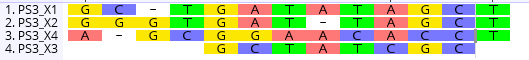

In [105]:
Image('X1X2X4-X3.png')

# 2) Implement the algorithm in Question 1 and solve the multi-seq alignment of the following four sequences. Use this scoring rule: +1 for match, -1 for mismatch, -1 for gap opening, -0.1 for gap extension. Report your final multi-seq alignment.
Following the same workflow as above, I aligned the sequeunces. 

In [107]:
S1 = 'ACCCCCAGGCCCTGGCCAAAGCCGTGCAGGTTCACCAGGATACTCTGCGCACCATGTACTTCGCTTGAAGGCAGAACGCTGTTACCTCACTGGATAGAAGAAAGCTTTCCAAGCCCCAGGAGCTGTGCCACCCAAATCCAGAGGAAGCAAGGAGGAGGGAGGTGGGGTAGGGAGGAGTGTAGGATGCCTTGTTTC'
S2 = 'GAGCCACATATCAGGGCAAAGCAATGGGCGAGACCCCCAGGCCCTGGCCAAAGCTGTGCAGGTTCACCAGGATACTCTACGCACCATGTACTTCGCTTGAAGGCAGAACGCTGTTACCTCACTGGATAGAAGAAAGCTTTCCAAGCCCTGGGAGCTGTACCACCCAAATCCAGAGGAAGCAAGGCAGAGGGAGGTGGGGTCGGAAGGAGTATAGGAGG'
S3 = 'GCAATGGTCGAGATCCTCAAGCGTTGGCCAAAGCGGTGCAGATTCACCACGACTCCCTGAGGACCATGTATTTTGCCTGAATAACAAAAAGCGCACGTCTCCGGACACCTCGAGCCAGAACCCCTGGGTGCTAAACCAGTCCAATGAAGCCCACA'
S4 = 'GGCAGAGCAATGGGCGGGACCCCCAGGCCCTGGCCAAAGCCGTGCAGGTTCACCAGGATACTCTGCGCACCATGTACTTCGCTTGAAGGCAGAACGCTGTTACCTCACTGGATAGAAGAAAGCTTTCCAAGCCCCAAGAGCTGTGCCGCCCAAATCCAGAGGAAGCAGGGAGGAGGGAGGTGGGGTAGGGAGGAATGC'

#pairwise2.align.globalxx(seq1, seq2, match, mismatch, open gap, extend gap)
S1S2 = pairwise2.align.globalms(S1,S2, 1, -1, -1, -.1)
S1S3 = pairwise2.align.globalms(S1,S3, 1, -1, -1, -.1)
S1S4 = pairwise2.align.globalms(S1,S4, 1, -1, -1, -.1)
S2S3 = pairwise2.align.globalms(S2,S3, 1, -1, -1, -.1)
S2S4 = pairwise2.align.globalms(S2,S4, 1, -1, -1, -.1)
S3S4 = pairwise2.align.globalms(S3,S4, 1, -1, -1, -.1)

all_alignments = (S1S2[0], S1S3[0], S1S4[0], S2S3[0], S2S4[0], S3S4[0])

best_alignment_score = 0
best_alignment = []
for i in range(len(all_alignments)):
    if all_alignments[i][2] > best_alignment_score:
        best_alignment_score = all_alignments[i][2]
        best_alignment = all_alignments[i]
        best_index = i
    else:
        pass
print(best_index)
print(best_alignment)

2
('------------------ACCCCCAGGCCCTGGCCAAAGCCGTGCAGGTTCACCAGGATACTCTGCGCACCATGTACTTCGCTTGAAGGCAGAACGCTGTTACCTCACTGGATAGAAGAAAGCTTTCCAAGCCCCAGGAGCTGTGCCACCCAAATCCAGAGGAAGCAAGGAGGAGGGAGGTGGGGTAGGGAGGAGTGTAGGATGCCTTGTTTC', 'GGCAGAGCAATGGGCGGGACCCCCAGGCCCTGGCCAAAGCCGTGCAGGTTCACCAGGATACTCTGCGCACCATGTACTTCGCTTGAAGGCAGAACGCTGTTACCTCACTGGATAGAAGAAAGCTTTCCAAGCCCCAAGAGCTGTGCCGCCCAAATCCAGAGGAAGCAGGGAGGAGGGAGGTGGGGTAGGGAGGA-------ATG--------C', 168.00000000000009, 0, 213)


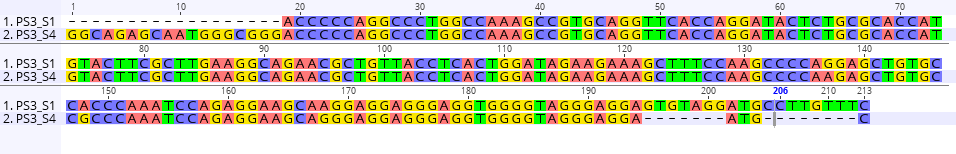

In [108]:
Image('S1S4.png')

Next, perform all alignments to the S1S4 alignment

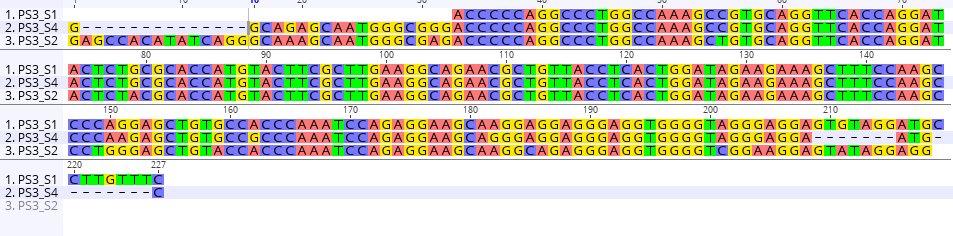

In [110]:
Image('S1S4-S2.png')

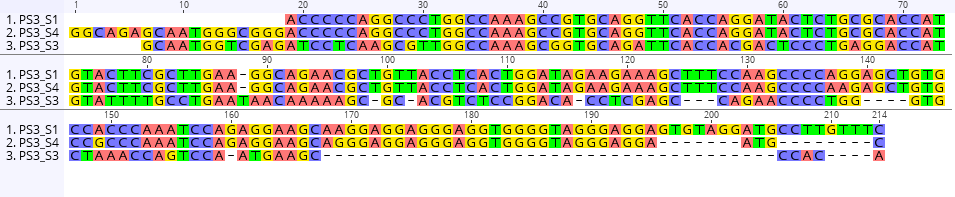

In [111]:
Image('S1S4-S3.png')

In [118]:
S1S4_S2 = [['--------------------------------ACCCCCAGGCCCTGGCCAAAGCCGTGCAGGTTCACCAGGATACTCTGCGCACCATGTACTTCGCTTGAAGGCAGAACGCTGTTACCTCACTGGATAGAAGAAAGCTTTCCAAGCCCCAGGAGCTGTGCCACCCAAATCCAGAGGAAGCAAGGAGGAGGGAGGTGGGGTAGGGAGGAGTGTAGGATGCCTTGTTTC'],
           ['G--------------GCAGAGCAATGGGCGGGACCCCCAGGCCCTGGCCAAAGCCGTGCAGGTTCACCAGGATACTCTGCGCACCATGTACTTCGCTTGAAGGCAGAACGCTGTTACCTCACTGGATAGAAGAAAGCTTTCCAAGCCCCAAGAGCTGTGCCGCCCAAATCCAGAGGAAGCAGGGAGGAGGGAGGTGGGGTAGGGAGGA-------ATG--------C'],
           ['GAGCCACATATCAGGGCAAAGCAATGGGCGAGACCCCCAGGCCCTGGCCAAAGCTGTGCAGGTTCACCAGGATACTCTACGCACCATGTACTTCGCTTGAAGGCAGAACGCTGTTACCTCACTGGATAGAAGAAAGCTTTCCAAGCCCTGGGAGCTGTACCACCCAAATCCAGAGGAAGCAAGGCAGAGGGAGGTGGGGTCGGAAGGAGTATAGGAGG---------']]

S1S4_S3 = [['------------------ACCCCCAGGCCCTGGCCAAAGCCGTGCAGGTTCACCAGGATACTCTGCGCACCATGTACTTCGCTTGAA-GGCAGAACGCTGTTACCTCACTGGATAGAAGAAAGCTTTCCAAGCCCCAGGAGCTGTGCCACCCAAATCCAGAGGAAGCAAGGAGGAGGGAGGTGGGGTAGGGAGGAGTGTAGGATGCCTTGTTTC'],
           ['GGCAGAGCAATGGGCGGGACCCCCAGGCCCTGGCCAAAGCCGTGCAGGTTCACCAGGATACTCTGCGCACCATGTACTTCGCTTGAA-GGCAGAACGCTGTTACCTCACTGGATAGAAGAAAGCTTTCCAAGCCCCAAGAGCTGTGCCGCCCAAATCCAGAGGAAGCAGGGAGGAGGGAGGTGGGGTAGGGAGGA-------ATG--------C'],
           ['------GCAATGGTCGAGATCCTCAAGCGTTGGCCAAAGCGGTGCAGATTCACCACGACTCCCTGAGGACCATGTATTTTGCCTGAATAACAAAAAGC-GC-ACGTCTCCGGACA-CCTCGAGC---CAGAACCCCTGG----GTGCTAAACCAGTCCA-ATGAAGC--------------------------------------CCAC----A']]  

S1S4_S2_score = sum_pairs_score(S1S4_S2)
S1S4_S3_score = sum_pairs_score(S1S4_S3)

if S1S4_S2 > S1S4_S3:
    print('Keep S1S4_S2 alignment')
else: 
    print('Keep S1S4_S3 alignment')

Keep S1S4_S3 alignment


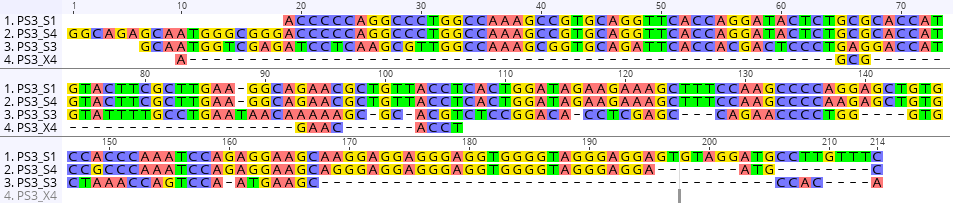

In [119]:
Image('S1S4S3S2.png')

# 3) Given the pairwise alignment of part of Oct4 gene and the codon table below, calculate the dN/dS ratio
## 3A) What’s the overall dN/dS ratio?
## 3B) What’s the dN/dS ratio of the left half and the right half respectively?
## 3C) What does this suggest about evolutionary selection?


In [13]:
#Translate both sequences
human_dna = Seq("TTGTCTAATGTCATTCTCCTTTCTGTCATTCACTTGCAGGTGGTCCGAGTGTGGTTCTGTAACCGGCGCCAGAAGGGC", generic_dna)
human_aa = human_dna.translate()
chicken_dna = Seq("GCTCATCCTTGCCCCTCCCCCTTCCCCCCTCCCTCGCAGGTTGTCCGGGTCTGGTTCTGCAACCGGCGTCAGAAAGGC", generic_dna)
chicken_aa = chicken_dna.translate()
# print(human_aa)
# print(chicken_aa)

#Calculate the Synonymous (nS) and non-synonymous (nN) substitutions
def dn_ds_ratio(seq1, seq2):
    """
    This function takes an ALREADY completed pairwise alignment and calculates the dn/ds ratio. 
    The sequences MUST be aligned before using this fxn. 
    """
    #Read in sequences and translate
    seq_1_dna = Seq(seq1, generic_dna)
    seq_2_dna = Seq(seq2, generic_dna)
    seq_1_aa = seq_1_dna.translate()
    seq_2_aa = seq_2_dna.translate()

    #-------------------------------------------------------------------------------#
    #Calculate nN, nS (synonymous and nonsynonymous substitutions)
    
    #Count number of base differences and aa differences
    seqs_zip = zip(seq_1_dna, seq_2_dna)
    seq_diff_count = 0
    for i,j in seqs_zip:
        if i == j: 
            pass 
        if i != j:
            seq_diff_count += 1
    
    aa_zip = zip(seq_1_aa, seq_2_aa)
    aa_diff_count = 0 
    for i,j in aa_zip:
        if i == j: 
            pass
        if i != j:
            aa_diff_count += 1
    
    nN = aa_diff_count
    nS = seq_diff_count - aa_diff_count
    
    #-------------------------------------------------------------------------------#
    #Calculate mS and mN (synonymous and nonsynonymous sites)
    
    #Break the two sequences into codons:
    seq_1_codons = []
    seq_2_codons = []
    for i in range(0, len(seq1), 3):
        seq_1_codons.append(seq1[i:i + 3])
    for i in range(0, len(seq2), 3):
        seq_2_codons.append(seq2[i:i + 3])
    seqs = (seq_1_codons, seq_2_codons)
    
    mS= 0 
    mN = 0
    for i in range(len(seq_1_codons)):
        codon_1 = seq_1_aa[i]
        codon_2 = seq_2_aa[i]
#         print(codon_1, seqs[0][i])
#         print(codon_2, seqs[1][i])
        
        for pos in range(0,3):
            #initialize the synonymous score for 1st seq:
            syn_score_1 = 0
            non_syn_score_1 = 0
            #Determine if a substitution at each site for seq 1 makes a synonymous mutation
            if seqs[0][i][pos] == 'A':
                sub_T_seq = seqs[0][i][:pos] + 'T' + seqs[0][i][pos+1:]
                tsTs = (Seq(sub_T_seq, generic_dna)).translate()
                if tsTs == codon_1:
                    syn_score_1 += 1
                else:
                    non_syn_score_1 += 1
                    
                sub_C_seq = seqs[0][i][:pos] + 'C' + seqs[0][i][pos+1:]
                tsCs = (Seq(sub_C_seq, generic_dna)).translate()
                if tsCs == codon_1:
                    syn_score_1 += 1
                else:
                    non_syn_score_1 += 1
                    
                sub_G_seq = seqs[0][i][:pos] + 'G' + seqs[0][i][pos+1:]
                tsGs = (Seq(sub_G_seq, generic_dna)).translate()
                if tsGs == codon_1:
                    syn_score_1 += 1
                else:
                    non_syn_score_1 += 1
                    
#                 print(seqs[0][i], sub_T_seq, sub_C_seq, sub_G_seq)
            if seqs[0][i][pos] == 'G':
                
                sub_T_seq = seqs[0][i][:pos] + 'T' + seqs[0][i][pos+1:]
                tsTs = (Seq(sub_T_seq, generic_dna)).translate()
                if tsTs == codon_1:
                    syn_score_1 += 1
                else:
                    non_syn_score_1 += 1
                    
                sub_C_seq = seqs[0][i][:pos] + 'C' + seqs[0][i][pos+1:]
                tsCs = (Seq(sub_C_seq, generic_dna)).translate()
                if tsCs == codon_1:
                    syn_score_1 += 1
                else:
                    non_syn_score_1 += 1
                    
                sub_A_seq = seqs[0][i][:pos] + 'A' + seqs[0][i][pos+1:]
                tsAs = (Seq(sub_A_seq, generic_dna)).translate()
                if tsAs == codon_1:
                    syn_score_1 += 1
                else:
                    non_syn_score_1 += 1
#                 print(seqs[0][i], sub_T_seq, sub_C_seq, sub_G_seq)
            if seqs[0][i][pos] == 'C':
                
                sub_T_seq = seqs[0][i][:pos] + 'T' + seqs[0][i][pos+1:]
                tsTs = (Seq(sub_T_seq, generic_dna)).translate()
                if tsTs == codon_1:
                    syn_score_1 += 1
                else:
                    non_syn_score_1 += 1
                    
                sub_A_seq = seqs[0][i][:pos] + 'A' + seqs[0][i][pos+1:]
                tsAs = (Seq(sub_A_seq, generic_dna)).translate()
                if tsAs == codon_1:
                    syn_score_1 += 1
                else:
                    non_syn_score_1 += 1
                    
                sub_G_seq = seqs[0][i][:pos] + 'G' + seqs[0][i][pos+1:]
                tsGs = (Seq(sub_G_seq, generic_dna)).translate()
                if tsGs == codon_1:
                    syn_score_1 += 1
                else:
                    non_syn_score_1 += 1                    
#                 print(seqs[0][i], sub_T_seq, sub_C_seq, sub_G_seq)
            if seqs[0][i][pos] == 'T':
                sub_A_seq = seqs[0][i][:pos] + 'A' + seqs[0][i][pos+1:]
                tsAs = (Seq(sub_A_seq, generic_dna)).translate()
                if tsAs == codon_1:
                    syn_score_1 += 1
                else:
                    non_syn_score_1 += 1
                    
                sub_C_seq = seqs[0][i][:pos] + 'C' + seqs[0][i][pos+1:]
                tsCs = (Seq(sub_C_seq, generic_dna)).translate()
                if tsCs == codon_1:
                    syn_score_1 += 1
                else:
                    non_syn_score_1 += 1
                    
                sub_G_seq = seqs[0][i][:pos] + 'G' + seqs[0][i][pos+1:]
                tsGs = (Seq(sub_G_seq, generic_dna)).translate()
                if tsGs == codon_1:
                    syn_score_1 += 1
                else:
                    non_syn_score_1 += 1                    
#                 print(seqs[0][i], sub_T_seq, sub_C_seq, sub_G_seq)
            
            
            # ---------------# 
            
            #initialize the synonymous score for 2nd seq:
            syn_score_2 = 0
            non_syn_score_2 = 0
            #Determine if a substitution at each site for seq 2 makes a synonymous mutation
            if seqs[1][i][pos] == 'A':
                sub_T_seq = seqs[1][i][:pos] + 'T' + seqs[1][i][pos+1:]
                tsTs = (Seq(sub_T_seq, generic_dna)).translate()
                if tsTs == codon_2:
                    syn_score_2 += 1
                else:
                    non_syn_score_2 += 1   
                    
                sub_C_seq = seqs[1][i][:pos] + 'C' + seqs[1][i][pos+1:]
                tsCs = (Seq(sub_C_seq, generic_dna)).translate()
                if tsCs == codon_2:
                    syn_score_2 += 1
                else:
                    non_syn_score_2 += 1  
                    
                sub_G_seq = seqs[1][i][:pos] + 'G' + seqs[1][i][pos+1:]
                tsGs = (Seq(sub_G_seq, generic_dna)).translate()
                if tsGs == codon_2:
                    syn_score_2 += 1
                else:
                    non_syn_score_2 += 1  
                    
#                 print(seqs[1][i], sub_T_seq, sub_C_seq, sub_G_seq)
            if seqs[1][i][pos] == 'G':
                
                sub_T_seq = seqs[1][i][:pos] + 'T' + seqs[1][i][pos+1:]
                tsTs = (Seq(sub_T_seq, generic_dna)).translate()
                if tsTs == codon_2:
                    syn_score_2 += 1
                else:
                    non_syn_score_2 += 1  
                    
                sub_C_seq = seqs[1][i][:pos] + 'C' + seqs[1][i][pos+1:]
                tsCs = (Seq(sub_C_seq, generic_dna)).translate()
                if tsCs == codon_2:
                    syn_score_2 += 1
                else:
                    non_syn_score_2 += 1  
                    
                sub_A_seq = seqs[1][i][:pos] + 'A' + seqs[1][i][pos+1:]
                tsAs = (Seq(sub_A_seq, generic_dna)).translate()
                if tsAs == codon_2:
                    syn_score_2 += 1
                else:
                    non_syn_score_2 += 1  
                    
#                 print(seqs[1][i], sub_T_seq, sub_C_seq, sub_G_seq)
            if seqs[1][i][pos] == 'C':
                
                sub_T_seq = seqs[1][i][:pos] + 'T' + seqs[1][i][pos+1:]
                tsTs = (Seq(sub_T_seq, generic_dna)).translate()
                if tsTs == codon_2:
                    syn_score_2 += 1
                else:
                    non_syn_score_2 += 1  
                    
                sub_A_seq = seqs[1][i][:pos] + 'A' + seqs[1][i][pos+1:]
                tsAs = (Seq(sub_A_seq, generic_dna)).translate()
                if tsAs == codon_2:
                    syn_score_2 += 1
                else:
                    non_syn_score_2 += 1  
                    
                sub_G_seq = seqs[1][i][:pos] + 'G' + seqs[1][i][pos+1:]
                tsGs = (Seq(sub_G_seq, generic_dna)).translate()
                if tsGs == codon_2:
                    syn_score_2 += 1
                else:
                    non_syn_score_2 += 1  
                    
#                 print(seqs[1][i], sub_T_seq, sub_C_seq, sub_G_seq)
            if seqs[1][i][pos] == 'T':
                sub_A_seq = seqs[1][i][:pos] + 'A' + seqs[1][i][pos+1:]
                tsAs = (Seq(sub_A_seq, generic_dna)).translate()
                if tsAs == codon_2:
                    syn_score_2 += 1
                else:
                    non_syn_score_2 += 1  
                    
                sub_C_seq = seqs[1][i][:pos] + 'C' + seqs[1][i][pos+1:]
                tsCs = (Seq(sub_C_seq, generic_dna)).translate()
                if tsCs == codon_2:
                    syn_score_2 += 1
                else:
                    non_syn_score_2 += 1  
                    
                sub_G_seq = seqs[1][i][:pos] + 'G' + seqs[1][i][pos+1:]
                tsGs = (Seq(sub_G_seq, generic_dna)).translate()
                if tsGs == codon_2:
                    syn_score_2 += 1
                else:
                    non_syn_score_2 += 1                      
#                 print(seqs[1][i], sub_T_seq, sub_C_seq, sub_G_seq)

            #-------------# 
    
            #Calculate the syn and non-syn seq for 1st seq
            syn_score_1 = syn_score_1 / 3
            non_syn_score_1 = non_syn_score_1 / 3
            #Calculate the syn and non-syn scores for 2nd sequence
            syn_score_2 = syn_score_2 / 3
            non_syn_score_2 = non_syn_score_2 / 3
            
#             print("syn_score/non_syn_score 1", syn_score_1, non_syn_score_1)
#             print("syn_score/non_syn_score 2",syn_score_2, non_syn_score_2)

#             mean_syn_score = (syn_score_1 + syn_score_2)/2
#             mean_non_score = (non_syn_score_1 + non_syn_score_2)/2
#             print( "mean syn/non", mean_syn_score, mean_non_score)
            mN += non_syn_score_1
            mS += syn_score_1
 
            

#             print('done with this position')
#         print('done with this codon')
    dS = nS / mS
    dN = nN / mN
    dN_dS = dN / dS
    return(dN, dS, dN_dS)
    
 
dn_ds_ratio('ACTCCGAACGGGGCGTTAGAGTTGAAACCCGTTAGA', 'ACGCCGATCGGCGCGATAGGGTTCAAGCTCGTACGA')



(0.18518518518518515, 0.5555555555555556, 0.33333333333333326)

In [14]:
dn_ds_ratio('GTTATGAAGACC', 'GTACTGAAAACC')

(0.10344827586206895, 0.8571428571428572, 0.12068965517241377)

In [15]:
dn_ds_ratio('ACTCCGAACGGGGCGTTAGAGTTGAAACCCGTTAGA', 'ACGCCGATCGGCGCGATAGGGTTCAAGCTCGTACGA')

(0.18518518518518515, 0.5555555555555556, 0.33333333333333326)

In [16]:
#Overall dn/ds ratio
dn_ds_ratio('TTGTCTAATGTCATTCTCCTTTCTGTCATTCACTTGCAGGTGGTCCGAGTGTGGTTCTGTAACCGGCGCCAGAAGGGC', 
            'GCTCATCCTTGCCCCTCCCCCTTCCCCCCTCCCTCGCAGGTTGTCCGGGTCTGGTTCTGCAACCGGCGTCAGAAAGGC')

(0.2033898305084746, 0.9473684210526315, 0.21468926553672318)

In [17]:
#Left side dn/ds ratio
dn_ds_ratio('TTGTCTAATGTCATTCTCCTTTCTGTCATTCACTTGCAG', 
            'GCTCATCCTTGCCCCTCCCCCTTCCCCCCTCCCTCGCAG')

(0.409090909090909, 1.2413793103448274, 0.32954545454545453)

In [18]:
#Right side dn/ds ratio
dn_ds_ratio('GTGGTCCGAGTGTGGTTCTGTAACCGGCGCCAGAAGGGC', 
            'GTTGTCCGGGTCTGGTTCTGCAACCGGCGTCAGAAAGGC')

(0.0, 0.6428571428571429, 0.0)

# 4) Consider the phylogenetic tree of various mammalian species below. The distances were computed based on the divergence of ancestral repeats in each lineage.

## 4A) Assuming additivity of distance, what is the evolutionary distance between human and horse?

In [19]:
sum_distances = 0.005873+0.013037+0.013037+0.0365+0.0365+0.015682+0.006272+0.019763+0.018928+0.012398+0.007287+0.099323
print(sum_distances)

0.28459999999999996


## 4B) Why is the tree length longer for the Tenrec than the Elephant?
The length of branches represent the amount of evolutionary change that has occurred. In this case, the Tenrec's genetic sequence has diverged more from the most common recent ancestor than the elephant.

## 4C) Would the tree topology or branch lengths change if the distances were computed on a region of the genome that was under positive selection? Why?

Branch lengths would change. Under positive selection, sequences are mutating faster than they would with genetic drift. This would make it appear that the sequences had been changing for a longer time than they actually had been. So branch lengths may be longer than they actually are.  
Topology may not necessarily change. 

# 5) Given the distance matrix of five species below, use UPGMA to construct the evolutionary tree

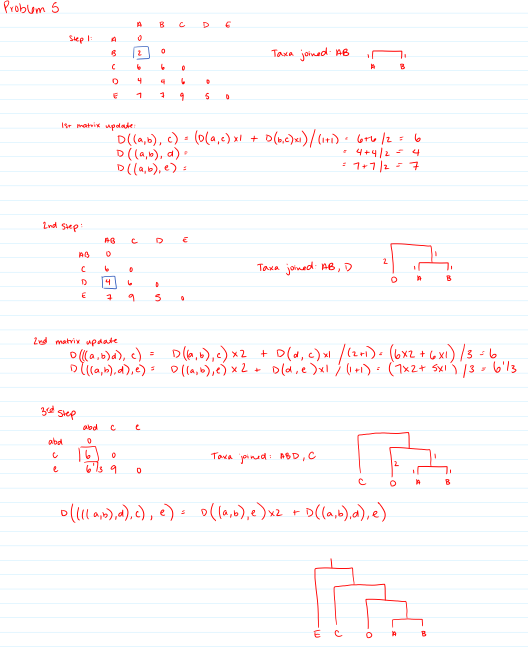

In [20]:
Image('UPGMA_calc.png')

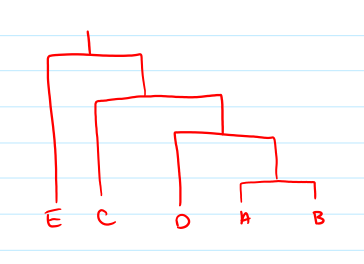

In [21]:
Image('UPGMA_tree.png')

# 6) Mir106a is conserved across multiple species.



## 6.4) now consider the sequences in the blue box and the phylogenetic tree below, solve the small parsimony problem (label the internal vertices)

## 6.1) calculate the mutual information of the positions labeled by red boxes


In [22]:
from sklearn.metrics import mutual_info_score
print(mutual_info_score(['T', 'T', 'A', 'T', 'T' ], ['A', 'A', 'T', 'A', 'A']))

#OR 
Mutual_information = 1

0.500402423538


## 6.2) comment on the value you get
For 2 discrete variables (like the two positions), calculating the mutual information tells you how much you can know about a position when you know the first position. If at position 1 you have a T, then you are sure that you have an A at the second position. If you have an A at position 2, then you always have a T at position 2. This suggests that the two positions might be coevolving and may be structurally connected.

## 6.3) find another pair of positions with a similar mutual information value

In [23]:
print(mutual_info_score(['T', 'T', 'T', 'A', 'T' ], ['G', 'G', 'G', 'A', 'G']))

0.500402423538


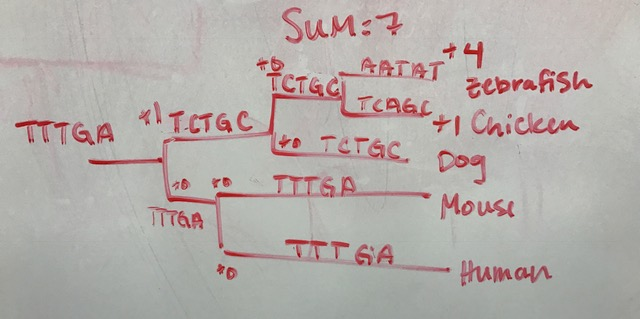

In [24]:
Image('Fitch.jpg')

TTTGA and TCTGC have 2 differences. 

# 7) According to the mir106a sequences of chicken and human given in Question 6

## 7A) calculate the observed proportion of nucleotides that differ between these two sequences

In [25]:
c_mir = 'CCTTGAGTTGTGCAAAAGTGCTTACAGTGCAGGTAGAGCTCAGC-ACCTACTGCAGTATAAGCACTTCTGGCATGACCGTGG-'
h_mir = '-CCTTGGCCATGTAAAAGTGCTTACAGTGCAGGTAGCTTTTTGAGATCTACTGCAATGTAAGCACTTCTTACATTACCATGG-'


mir_seqs = zip(c_mir, h_mir)
seq_diff_count = 0
for i,j in mir_seqs:
    if i == j: 
        pass 
    if i != j:
        seq_diff_count += 1
print(seq_diff_count)
len_seqs = len(c_mir)
proportion = seq_diff_count/len_seqs

print(proportion)

22
0.26506024096385544


## 7B) if mutation rate = 0.001, calculate the distance between chicken and human based on Jukes-Cantor Model

In [26]:
#d_ij = t = -(1/4)*(1/0.001)*log(1-(4/3)*(0.26))
d_ij = (-1/4)*(1/0.001)*math.log(1-((4/3)*(0.26)))
print(d_ij)

106.41695385642096


# EC 1 Find a 4 x 4 distance matrix for which there is no tree, prove that this matrix is a distance matrix, and prove that there is no tree for this distance matrix.


# EC 2 Generate a random primordial sequences of length 1000 bp, apply substitutions according to the Jukes-Cantor model with a substation rate of 10^{-9} substitutions per bp per year, and plot the number of observed substitutions as a function of evolutionary time from 0 to 10^9 years. Repeat this evolutionary process including the random generation of the primordial sequence ten times, fit the ten curves by a function, and provide an equation of that function including all parameters.

In [60]:
def randombase_generator(current_base):
    """Randomly picks one of the 4 bases"""
    not_a = ['T', 'C', 'G']
    not_t = ['A', 'C', 'G']
    not_g = ['A', 'T', 'G']
    not_c = ['A', 'C', 'T']
    
    if current_base == 'A':
        mutated_base = random.choice(not_a)
    elif current_base == 'T':
        mutated_base = random.choice(not_t)
    elif current_base == 'C':
        mutated_base = random.choice(not_c)
    elif current_base == 'G':
        mutated_base = random.choice(not_g)
    return mutated_base

def mutator_fxn(seq_len, mutation_rate):
    '''
    This function takes a sequence and mutates it at a certain rate. Running fxn once represents
    '''
    #generate a random sequence of seq_len
    random_sequence = []
    for _ in range(seq_len):
        random_sequence.append(choice([0,1,2,3]))
        
    #turn string into a list so that it is mutable
    random_seq= list(random_sequence)
    print(random_seq)
    
    
    #For each mutation, pick a random position, and randomly mutate it to another base
    for _ in range(mutations):
        #Select a random base positon (rbp)       
        rbp = np.random.choice(seq_len)
        print("random position ", random_seq[rbp])
        #Add a random amount 
        add_amount = np.random.choice([1,2,3])
        new_base = random_seq[rbp] + add_amount
        new_base = new_base%4
        print("new base", new_base)
        random_seq[rpb] = new_base        
    random_sequence = ''.join(sequence)
    print(random_sequence)
    return sequence

test = mutator_fxn(4 , 0.25)



# sequence_list = []
# for _ in range(100000):
#     sequence = mutator_fxn(sequence, 0.001)
#     sequence_list.append(sequence)
# # print(sequence_list)
        
# #make a list of number of mutations accumulated
# mutations=[]
# for seq in sequence_list:
#     seqs = zip(seq, original_seq)
#     seq_diff_count = 0
#     for i,j in seqs:
#         if i == j: 
#             pass 
#         if i != j:
#             seq_diff_count += 1
#     mutations.append(seq_diff_count)
    
# # print(mutations)

# import matplotlib.pyplot as plt
# plt.plot(mutations)
# plt.show()


[0, 2, 3, 3]
0
GGCTCCCCATAACTGCGGACTGTTCACAACAAGCGCAAACCCGCACTCAGCACTAAATCAGACGACGTAATAATCACGATCGGATCTACACGAGAGTCTGGTGGGTGCTGTGTTCCCCAGGAAATTTGATCATCCACACCTAATGGGTGTGTAACCGAGGCCGACTAGTTACTACACCACTCCGGGTTTACCGCCCGTGACCTTAGTGGGCAAGCTGGTTAGTCCGGAATCTACACGTCTAACCAGGATCGGTCAGACAAATCCCAATGGGGTACAACAGCTGATCGGCCTCGCTGTGCCTGGGGGTTGCGTACAGAAGACAAGAATGAAGAGAGCCAAATACGTTTCTAGGACCAATGGAGTAGTTTTAGGTTACGTCTCGCTTGTTTAAGTGGACGGAGAACGGGCATTAAGCAGACGTAGCAGCAGCGCCCTTTACTGTGCACGCATTCGGGCCTCGAAACAAGATTCTTGGCCGTGCACACGGTTCCGCTGGTGAGCCTTCCGACATATCTTCCGAATAGGCGAGTATGGTAGAAATCACCGAGTCACGGGGCGACCTCAAACGGACCGAGTTGACTCGGTGTTTACATTGCTGCAAATCGTCCGGGACCCAGGGCAAAGGTGAAAGCCATGTGTTCTTTCGAATAGGTAGCAGCAGGGAGTCAGTGGGTAGTACTCGCAGGGCAAGAGCCACTAATTAACGTTGGGTTGACAGTCCTTCGTCGTTGGAAGGGCATACATGACAGCAAGCGCGGGCCCAGTCTTGTGCCTATGCGTCCGGATACACGCACTCTCGACCCCGCTAATGTTACTGCTATTATCCTCGTGACCATTACCCTGTCGTATCGACGTTATTATGCTCCGGGGATAACGTAAATAATAATCCCATATTCATCAGCACAACATTGTCACAGTCTTTCGTAGATCTGAGGGAGGAACCTGATTTAACACGCTCGTGACGTACGGTTTAACCAATGCGATA

In [ ]:
def randombase_generator(current_base):
    """Randomly picks one of the 4 bases"""
    not_a = ['T', 'C', 'G']
    not_t = ['A', 'C', 'G']
    not_g = ['A', 'T', 'G']
    not_c = ['A', 'C', 'T']
    
    if current_base == 'A':
        mutated_base = random.choice(not_a)
    elif current_base == 'T':
        mutated_base = random.choice(not_t)
    elif current_base == 'C':
        mutated_base = random.choice(not_c)
    elif current_base == 'G':
        mutated_base = random.choice(not_g)
    return mutated_base

def mutator_fxn(seq_len, mutation_rate, time_steps):
    '''
    This function takes a sequence and mutates it at a certain rate. Running fxn once represents 1 time step
    Mutation rate should be for every 1000 years per sequence 
    '''
    #generate a random sequence of seq_len
    random_sequence = []
    for _ in range(seq_len):
        random_sequence.append(choice(['A','T','G','C']))

    original_sequence = random_sequence[:]
#     print('original seq', original_sequence)
    N = len(random_sequence)
    
    mutations = []
    for _ in range(time_steps):
        if random.uniform(0,1) < mutation_rate:
            #Pick a random position
            random_base_position = np.random.choice(N)
            current_base = random_sequence[random_base_position]
            
            #Replace that randomly selected base with a random base that isn't current base
            random_sequence[random_base_position] = randombase_generator(current_base)
        
        #Determine number of differences between     
#         print('rand',random_sequence)
#         print('orig',original_sequence)
        
        seq_diff_count = 0
        for i in range(N):
            if original_sequence[i] != random_sequence[i]:
                seq_diff_count += 1
            else:
                pass
        mutations.append(seq_diff_count) 
#         print(seq_diff_count)

    
    return mutations


mutations = mutator_fxn(1000, 0.001, 10000000)
import matplotlib.pyplot as plt
plt.plot(mutations)
plt.show()

# mutations = mutator_fxn(4, 1, 10)
# import matplotlib.pyplot as plt
# plt.plot(mutations)
# plt.show()


In [194]:
original_seq = ['A','T','C']
random_seq = ['A', 'G', 'C']
seq_diff_count = 0
for i in range(3):
    print(original_seq[i], random_seq)
    if original_seq[i] != random_seq[i]:
        seq_diff_count += 1
    else:
        pass
    print(seq_diff_count)

A ['A', 'G', 'C']
0
T ['A', 'G', 'C']
1
C ['A', 'G', 'C']
1
